| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|


This notebook is licensed under GPL 3.0. Please visit our Github [repo](https://github.com/edgi-govdata-archiving/ECHO_modules) for more information.

The notebook was collaboratively authored by the Environmental Data & Governance Initiative (EDGI) following [our authorship protocol](https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/)

For more information about this project, visit [our website](https://www.environmentalenforcementwatch.org/)

This is a Jupyter Notebook - a way to organize Python computer programming code. Hosting the notebook on Google Colab allows you to access and visualize data without actually needing to do any coding! The code is left visible for individuals with a knowledge of Python or for those wondering how this site was put together. This allows for a more interactive user experience.

Be sure to read the instructions in "How to Run" (below)  and the notes above each cell for important tips and context!

# ECHO_modules
#### How to Run this Notebook
![Instructions for running a Jupyter Notebook](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/overall_instructions.png?raw=true)

# Install ECHO_modules
Currently, after installation you may need to restart the runtime. This is specific to the Colab environment.

In [1]:
!pip install git+https://github.com/edgi-govdata-archiving/ECHO_modules@v0-1-0 &>/dev/null; # ECHO_modules

# Basic Usage
## Analyze Currently Active Facilities in a County

In [3]:
# Use the get_active_facilities function
from ECHO_modules.utilities import get_active_facilities
erie = get_active_facilities("NY", "County", ["ERIE"])
erie

/usr/local/lib/python3.10/dist-packages/ECHO_modules/utilities.py:353: DtypeWarning: Columns (5,11,104,105,108,119) have mixed types.Specify dtype option on import or set low_memory=False.
  df_active = get_echo_data( sql, 'REGISTRY_ID' )


FAC_NAME  \
REGISTRY_ID                                                       
110071424324                                    THE MONROE BLDG   
110008029105                                 NYSDOT BIN 1047550   
110013073235                                        ECWA BOSTON   
110051360246                     CHIAVETTAS CATERING SRVC,, INC   
110004510887                                   FRONTIER PLATING   
...                                                         ...   
110004423188                     UNITED PRECIOUS METAL REFINING   
110004423927                                      MANITOBA CORP   
110001602481                         CONCORD COMPRESSOR STATION   
110001616993                     PORTERVILLE COMPRESSOR STATION   
110000848584  TENNESSEE GAS PIPELINE CO LLC - COMPRESSOR STA...   

                      FAC_STREET     FAC_CITY FAC_STATE FAC_ZIP FAC_COUNTY  \
REGISTRY_ID                                                                  
110071424324        1786 MAIN ST      BUFFALO        NY   14208       ERIE   
110008029105               CR 85       AURORA        NY   14052       ERIE   
110013073235                 NaN          NaN        NY     NaN       ERIE   
110051360246                 NaN          NaN        NY     NaN       ERIE   
110004510887        68 BUELL AVE      BUFFALO        NY   14211       ERIE   
...                          ...          ...       ...     ...        ...   
110004423188    2781 TOWNLINE RD        ALDEN        NY   14004       ERIE   
110004423927     122 CENTRAL AVE    LANCASTER        NY   14086       ERIE   
110001602481  5510 GENESSEE ROAD  SPRINGVILLE        NY   14141       ERIE   
110001616993    350 HEMSTREET RD         ELMA        NY   14052       ERIE   
110000848584      7586 E EDEN RD         EDEN        NY   14057       ERIE   

              FAC_FIPS_CODE  FAC_EPA_REGION FAC_INDIAN_CNTRY_FLG  \
REGISTRY_ID                                                        
110071424324        36029.0             2.0                    N   
110008029105        36029.0             2.0                    N   
110013073235        36029.0             2.0                    N   
110051360246        36029.0             2.0                    N   
110004510887        36029.0             2.0                    N   
...                     ...             ...                  ...   
110004423188        36029.0             2.0                    N   
110004423927        36029.0             2.0                    N   
110001602481        36029.0             2.0                    N   
110001616993        36029.0             2.0                    N   
110000848584        36029.0             2.0                    N   

             FAC_FEDERAL_FLG  ... FAC_DATE_LAST_INSPECTION_STATE  \
REGISTRY_ID                   ...                                  
110071424324             NaN  ...                            NaN   
110008029105             NaN  ...                            NaN   
110013073235             NaN  ...                            NaN   
110051360246             NaN  ...                     01/26/2009   
110004510887             NaN  ...                     08/08/2023   
...                      ...  ...                            ...   
110004423188             NaN  ...                     10/20/2020   
110004423927             NaN  ...                     01/22/2018   
110001602481             NaN  ...                     09/27/2021   
110001616993             NaN  ...                     09/29/2020   
110000848584             NaN  ...                     09/27/2021   

             FAC_DATE_LAST_FORMAL_ACT_EPA FAC_DATE_LAST_FORMAL_ACT_ST  \
REGISTRY_ID                                                             
110071424324                          NaN                         NaN   
110008029105                          NaN                         NaN   
110013073235                          NaN                         NaN   
110051360246                     

## Save this Data to CSV Format

In [4]:
from ECHO_modules.utilities import write_dataset
write_dataset(erie, base = "Facilities", type = "County", state = "NY", regions = ["Erie"])

Wrote CSVs/Facilities-NY-County-Erie.csv


## Find and Chart the 10 Facilities Least Compliant with the Resource and Conservation Recovery Act (RCRA) over the Past 12 Quarters in this County

<AxesSubplot:title={'center':'RCRA facilities with the most non-compliant quarters in NY - Erie County'}, xlabel='Non-compliant quarters', ylabel='Facility'>

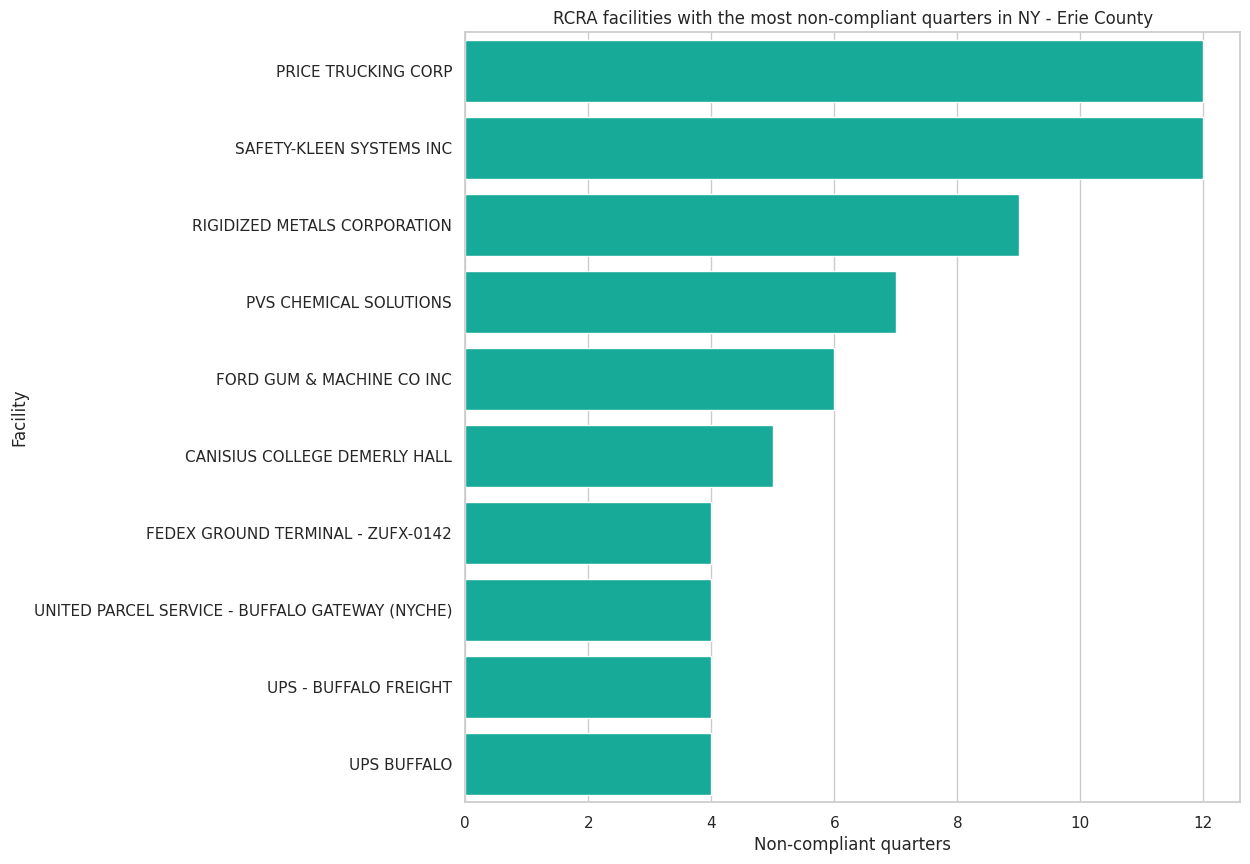

In [5]:
# Use get_top_violators and chart_top_violators
from ECHO_modules.utilities import get_top_violators, chart_top_violators
erie_top_violators = get_top_violators( erie, flag = 'RCRA_FLAG', noncomp_field = 'RCRA_3YR_COMPL_QTRS_HISTORY', action_field = 'RCRA_FORMAL_ACTION_COUNT', num_fac=10 )
chart_top_violators(erie_top_violators, state = 'NY', selections = "Erie County", epa_pgm = "RCRA" )

## Map these Top 10 RCRA Violators

In [6]:
from ECHO_modules.get_data import get_spatial_data # Module for getting spatial data from the SBU database
from ECHO_modules.geographies import spatial_tables # Variables that support spatial queries
from ECHO_modules.utilities import bivariate_map, map_style # Use this function and variable to make our map
county, state = get_spatial_data( region_type = "County", states = ["NY"], spatial_tables = spatial_tables, region_filter = "Erie") # Query and return spatial data
bivariate_map(regions = county, points = erie_top_violators)


        SELECT this.* 
        FROM tl_2020_us_county AS this
        JOIN tl_2020_us_state AS other 
        ON other.stusps IN ('NY') 
        AND ST_Within(this.wkb_geometry,other.wkb_geometry) AND this.name in ('Erie') 


## Get Historical (2001-Present) Records of RCRA Violations in this County

In [7]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant module
ds = make_data_sets(["RCRA Violations"]) # Create a DataSet for handling the data
erie_rcra_violations = ds["RCRA Violations"].store_results(region_type="County", region_value=["ERIE"], state="NY") # Store results for this DataSet as a DataSetResults object
erie_rcra_violations.dataframe # Show the results as a dataframe

Data last modified: 2023-11-05 00:00:00
There were 1827 program records found


ACTIVITY_LOCATION VIOLATION_TYPE  \
ID_NUMBER                                       
NYD991291782                NY          262.A   
NYD991291782                NY          262.A   
NYD991291782                NY          262.A   
NYD991291782                NY          262.A   
NYD991291782                NY          262.A   
...                        ...            ...   
NYD986929586                NY          262.A   
NYD071484596                NY          262.A   
NYD071484596                NY          262.A   
NYD986874048                NY          262.A   
NYN008017949                NY          261.A   

                                            VIOLATION_TYPE_DESC  \
ID_NUMBER                                                         
NYD991291782  Standards Applicable to Generators of HW: General   
NYD991291782  Standards Applicable to Generators of HW: General   
NYD991291782  Standards Applicable to Generators of HW: General   
NYD991291782  Standards Applicable to Generators of HW: General   
NYD991291782  Standards Applicable to Generators of HW: General   
...                                                         ...   
NYD986929586  Standards Applicable to Generators of HW: General   
NYD071484596  Standards Applicable to Generators of HW: General   
NYD071484596  Standards Applicable to Generators of HW: General   
NYD986874048  Standards Applicable to Generators of HW: General   
NYN008017949                      ID and Listing of HW: General   

             VIOL_DETERMINED_BY_AGENCY DATE_VIOLATION_DETERMINED  \
ID_NUMBER                                                          
NYD991291782                       S                  06/24/1987   
NYD991291782                       E                  06/24/1987   
NYD991291782                       S                  01/28/1987   
NYD991291782                       E                  08/26/1986   
NYD991291782                       S                  10/06/1988   
...                                ...                       ...   
NYD986929586                       S                  10/03/1991   
NYD071484596                       E                  09/21/2010   
NYD071484596                       S                  08/03/1989   
NYD986874048                       S                  08/22/1988   
NYN008017949                       S                  10/03/2007   

             ACTUAL_RTC_DATE SCHEDULED_COMPLIANCE_DATE  FAC_DERIVED_HUC  \
ID_NUMBER                                                                 
NYD991291782      11/23/1987                11/20/1987        4120103.0   
NYD991291782      11/23/1987                       NaN        4120103.0   
NYD991291782      10/25/1988                01/04/1988        4120103.0   
NYD991291782      04/27/1988                       NaN        4120103.0   
NYD991291782      06/26/1989                       NaN        4120103.0   
...                      ...                       ...              ...   
NYD986929586      11/06/1992                       NaN        4120104.0   
NYD071484596      06/16/2011                       NaN        4120103.0   
NYD071484596      11/08/1989                11/03/1989        4120103.0   
NYD986874048      11/21/1988                11/11/1988        4120103.0   
NYN008017949      10/26/2007                       NaN        4120103.0   

               REGISTRY_ID                               FAC_NAME  ...  \
ID_NUMBER                                                          ...   
NYD991291782  110060825406  ENRX FORMERLY - VOELKER ANALYSIS SITE  ...   
NYD991291782  110060825406  ENRX FORMERLY - VOELKER ANALYSIS SITE  ...   
NYD991291782  110060825406  ENRX FORMERLY - VOELKER ANALYSIS SITE  ...   
NYD991291782  110060825406  ENRX FORMERLY - VOELKER ANALYSIS SITE  ...   
NYD991291782  110060825406  ENRX FORMERLY - VOELKER ANALYSIS SITE  ...   
...                    ...                                    ...  ...   
NYD986929586  110009479554                    MORR

## Show RCRA Violations Over Time in a Chart

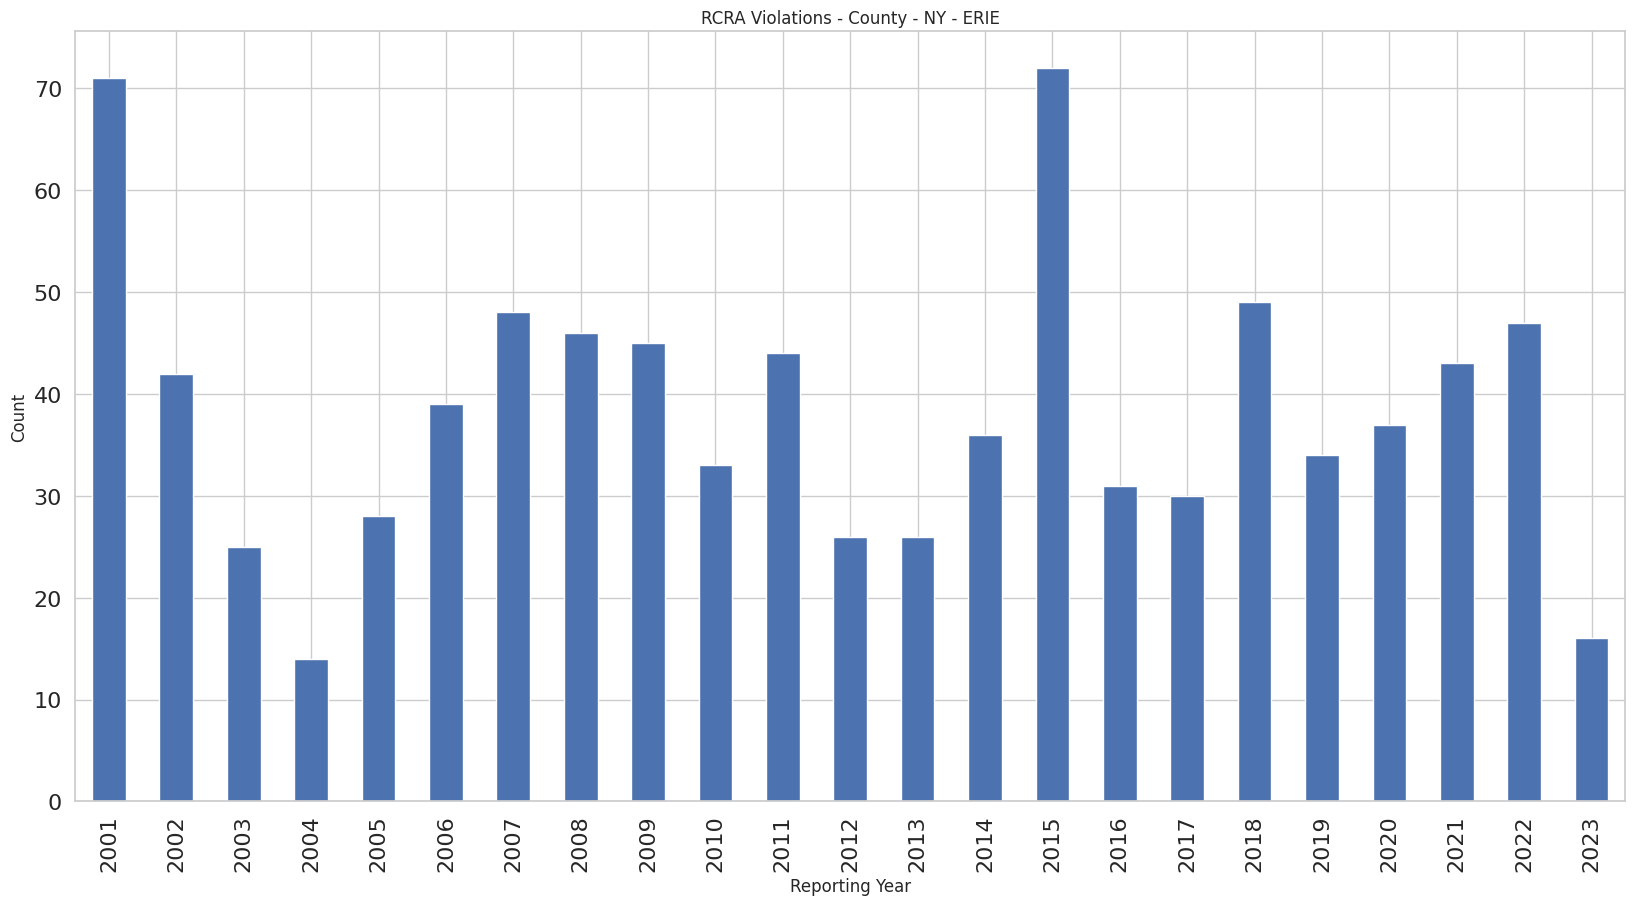

In [8]:
erie_rcra_violations.show_chart()

## Map Facilities in this County with Recorded RCRA Violations (2001-Present)

In [9]:
from ECHO_modules.utilities import aggregate_by_facility, point_mapper # Import relevant modules
erie_rcra_violations.region_value=["ERIE"] # (re)set the region_value as a list
aggregated_results = aggregate_by_facility(erie_rcra_violations, erie_rcra_violations.dataset.name, other_records=True) # Aggregate each entry using this function. In the case of RCRA violations, it will summarize each type of violation (permit, schedule, effluent, etc.) and then aggregate them for each facility over time. By setting other_records to True, we also get RCRA-regulated facilities in the county without records of violations.
point_mapper(aggregated_results["data"], aggregated_results["aggregator"], quartiles=True, other_fac=aggregated_results["diff"]) # Map each facility as a point, the size of which corresponds to the number of reported violations since 2001.

/usr/local/lib/python3.10/dist-packages/ECHO_modules/utilities.py:353: DtypeWarning: Columns (5,11,104,105,108,119) have mixed types.Specify dtype option on import or set low_memory=False.
  df_active = get_echo_data( sql, 'REGISTRY_ID' )


# Advanced Usage

## Multiple Geographies
A DataSetResults object can only store one kind of geography (e.g. ZIP codes OR Counties) but it can store multiple values of that geography (e.g. ZIPs: 53703, 52358, 04345, etc.)

Note: Zip Code geographies do not require setting the `state` variable to retrieve data/store results.

In [10]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant module
from ECHO_modules.utilities import aggregate_by_facility, point_mapper # Import relevant modules

ds = make_data_sets(["CWA Inspections"]) # Create a DataSet for handling the data
buffalo_cwa_inspections = ds["CWA Inspections"].store_results(region_type="Zip Code", region_value=["14201", "14202", "14303"]) # Store results for this DataSet as a DataSetResults object

aggregated_results = aggregate_by_facility(records = buffalo_cwa_inspections, program = buffalo_cwa_inspections.dataset.name, other_records=True) # Aggregate each entry using this function
point_mapper(aggregated_results["data"], aggregated_results["aggregator"], quartiles=True, other_fac=aggregated_results["diff"]) # Map each facility as a point, the size of which corresponds to the number of reported violations since 2001.

Data last modified: 2023-11-05 00:00:00
There were 492 program records found
select * from "ECHO_EXPORTER" where "FAC_ZIP" in ('14201','14202','14303') and "FAC_ACTIVE_FLAG" = 'Y'


## Multiple Programs

We can load as many programs (as DataSets) as we like for each set of geographies (in a DataSetResults object) (e.g. a list of Congressional Districts)

Information about available programs can be found in [here](https://github.com/edgi-govdata-archiving/ECHO_modules/blob/v0-1-0/SBU-db.md).

The following produces charts that summarize inspections, violations, and penalties under the Clean Air Act for two of New York's Congressional Districts - #25 and #26.

Data last modified: 2023-11-05 00:00:00
There were 9826 program records found
Data last modified: 2023-11-05 00:00:00
There were 239 program records found
Data last modified: 2023-11-05 00:00:00
There were 241 program records found


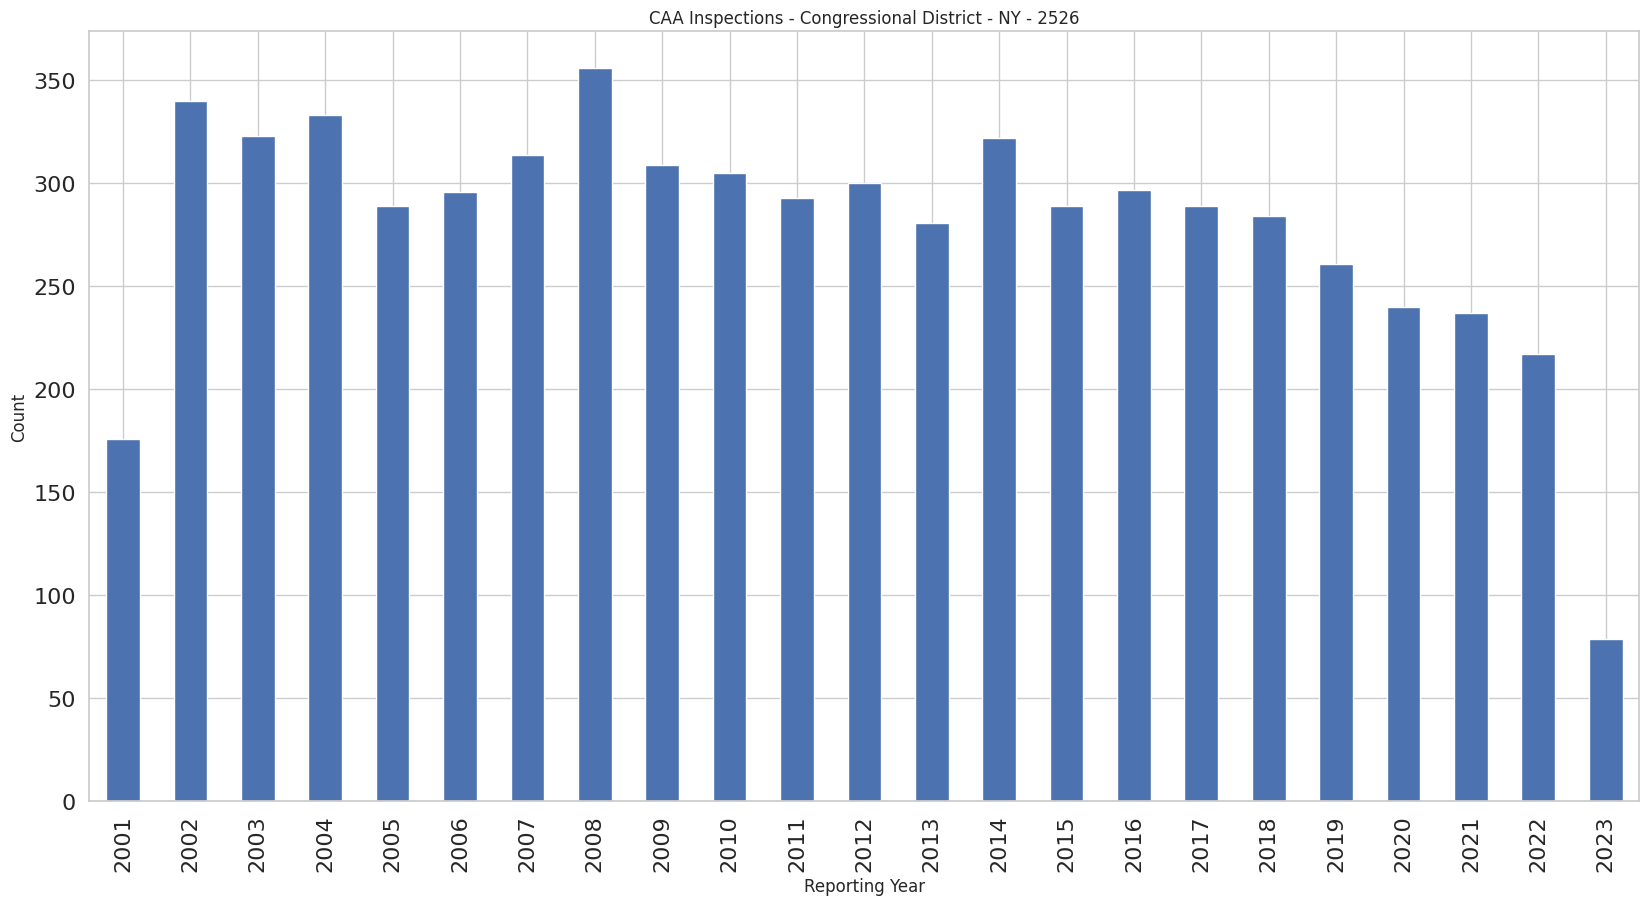

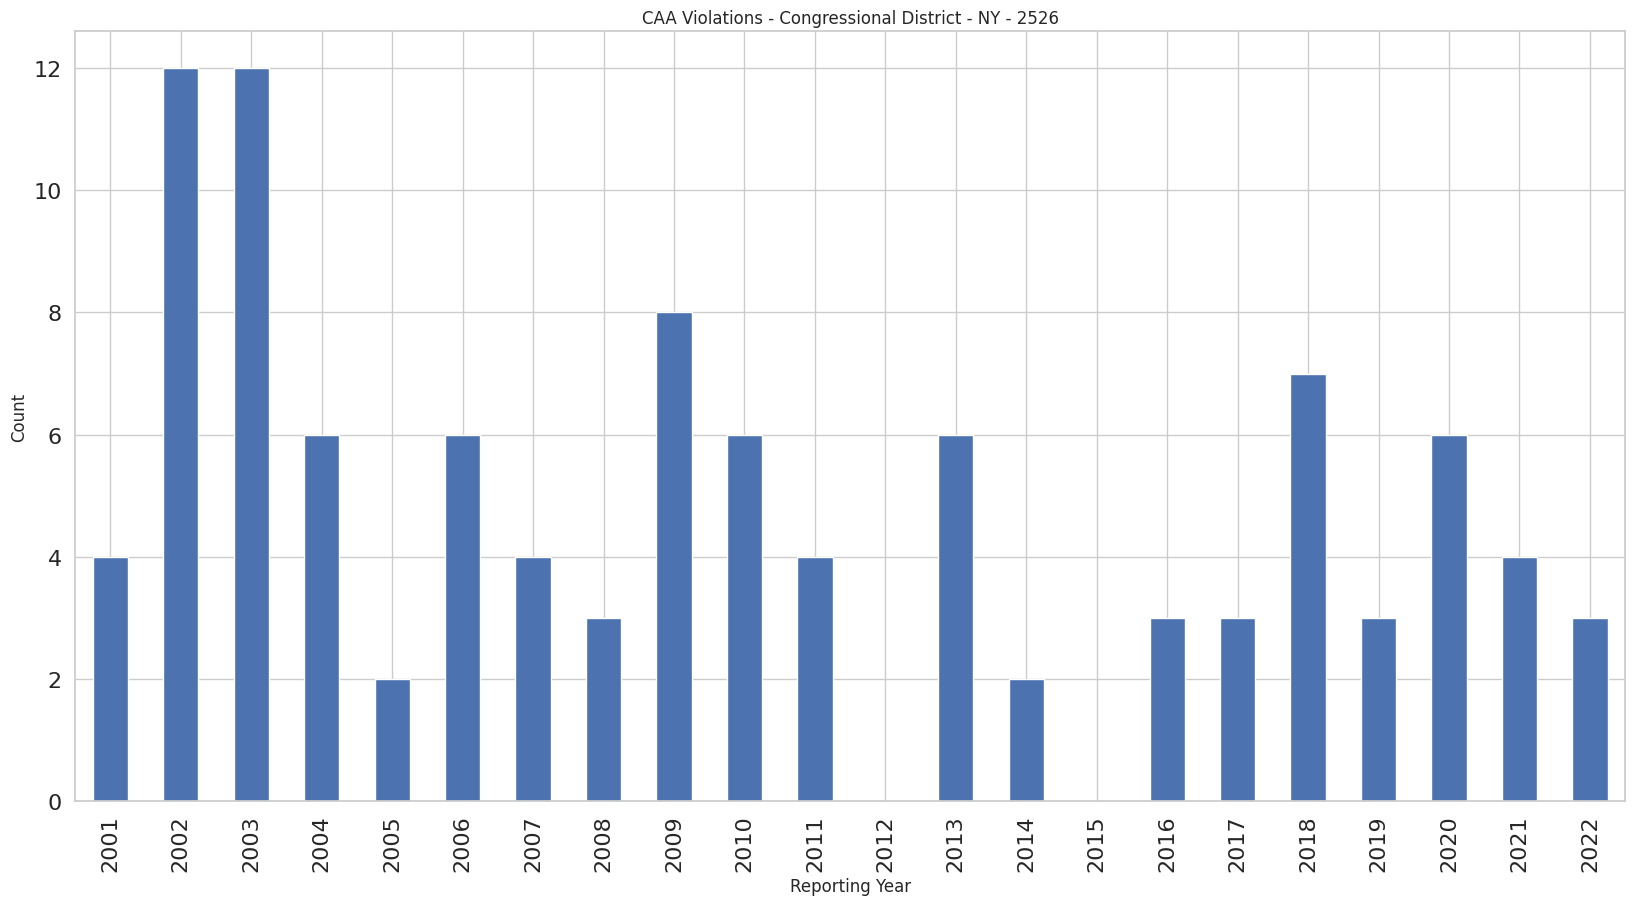

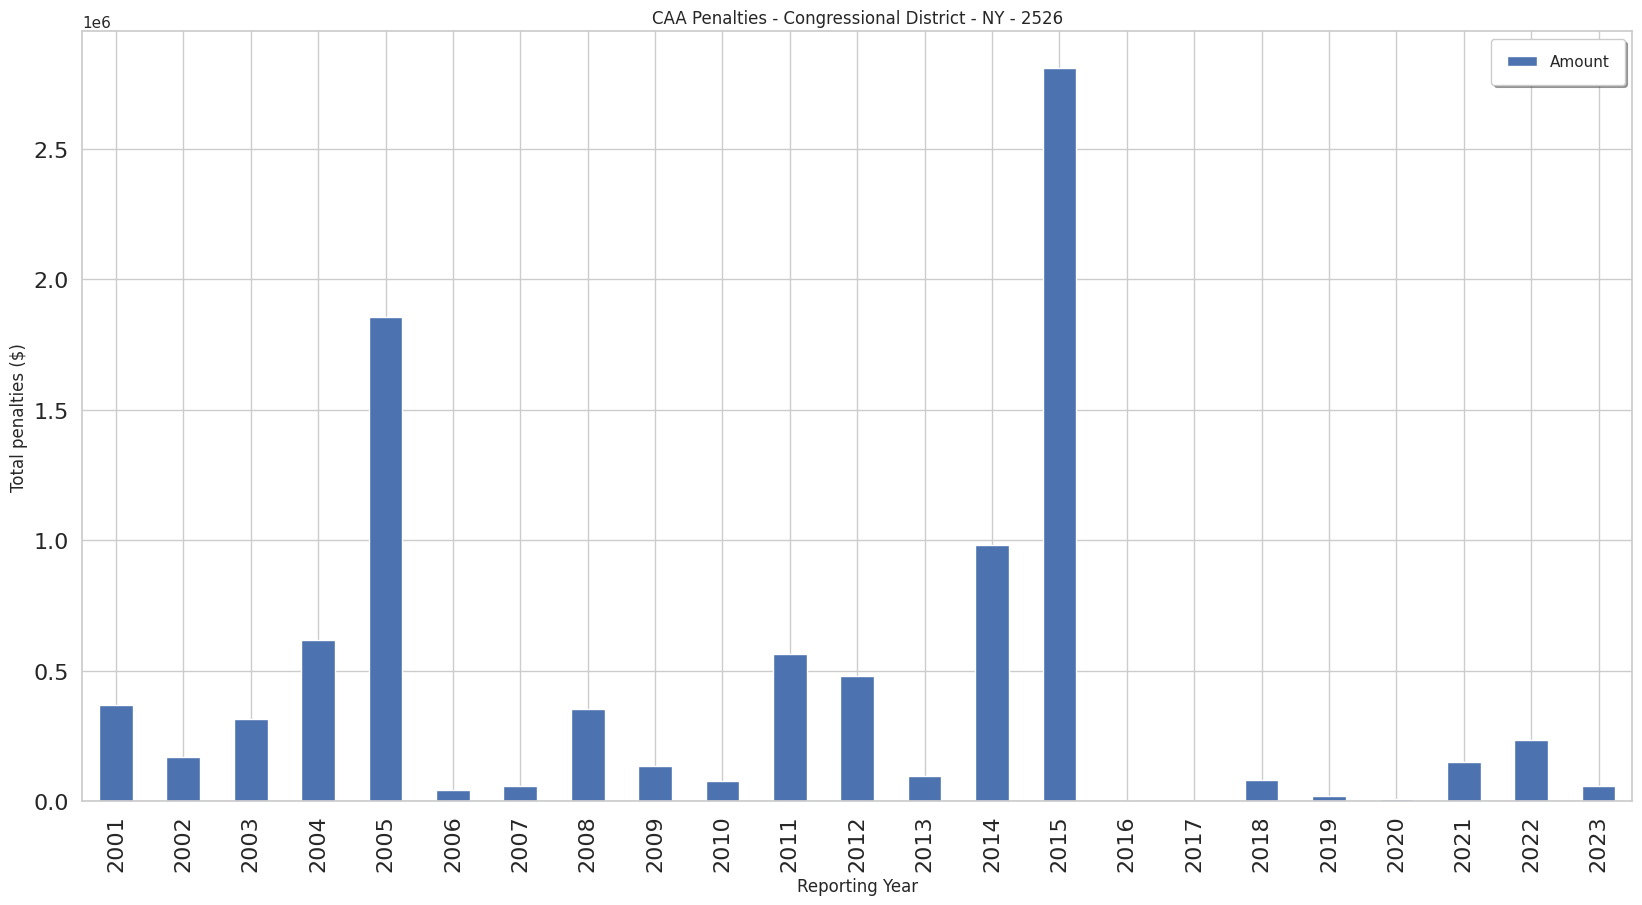

In [11]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant modules
from ECHO_modules.utilities import aggregate_by_facility, point_mapper

ds = make_data_sets(["CAA Inspections", "CAA Violations", "CAA Penalties"]) # Create a DataSet for handling the data
ny_cds_caa_inspections = ds["CAA Inspections"].store_results(region_type="Congressional District", region_value=["25", "26"], state = "NY") # Store results for this DataSet as a DataSetResults object
ny_cds_caa_violations = ds["CAA Violations"].store_results(region_type="Congressional District", region_value=["25", "26"], state = "NY") # Store results for this DataSet as a DataSetResults object
ny_cds_caa_penalties = ds["CAA Penalties"].store_results(region_type="Congressional District", region_value=["25", "26"], state = "NY") # Store results for this DataSet as a DataSetResults object

ny_cds_caa_inspections.show_chart()
ny_cds_caa_violations.show_chart()
ny_cds_caa_penalties.show_chart()

## GHGs and other Air Emissions
Beyond enforcement and compliance information, the ECHO database - and our copy of it at Stony Brook University - contains records of industry's self-report releases of various pollutants. These records originate from the Greenhouse Gas Reporting Program and the Toxics Release Inventory (TRI).

The following code returns these records for New York state. If you are interested in a specific GHG or TRI pollutant, some analysis would have to be written outside existing ECHO_modules - we haven't developed specific code to filter these tables to a pollutant(s). An example of this extra code is shown below, however - `ny_tri.dataframe.loc[ny_tri.dataframe['POLLUTANT_NAME'].str.lower().str.contains("mercury")]`

Data last modified: 2023-11-05 00:00:00
There were 6663 program records found
Data last modified: 2023-11-05 00:00:00
There were 19290 program records found


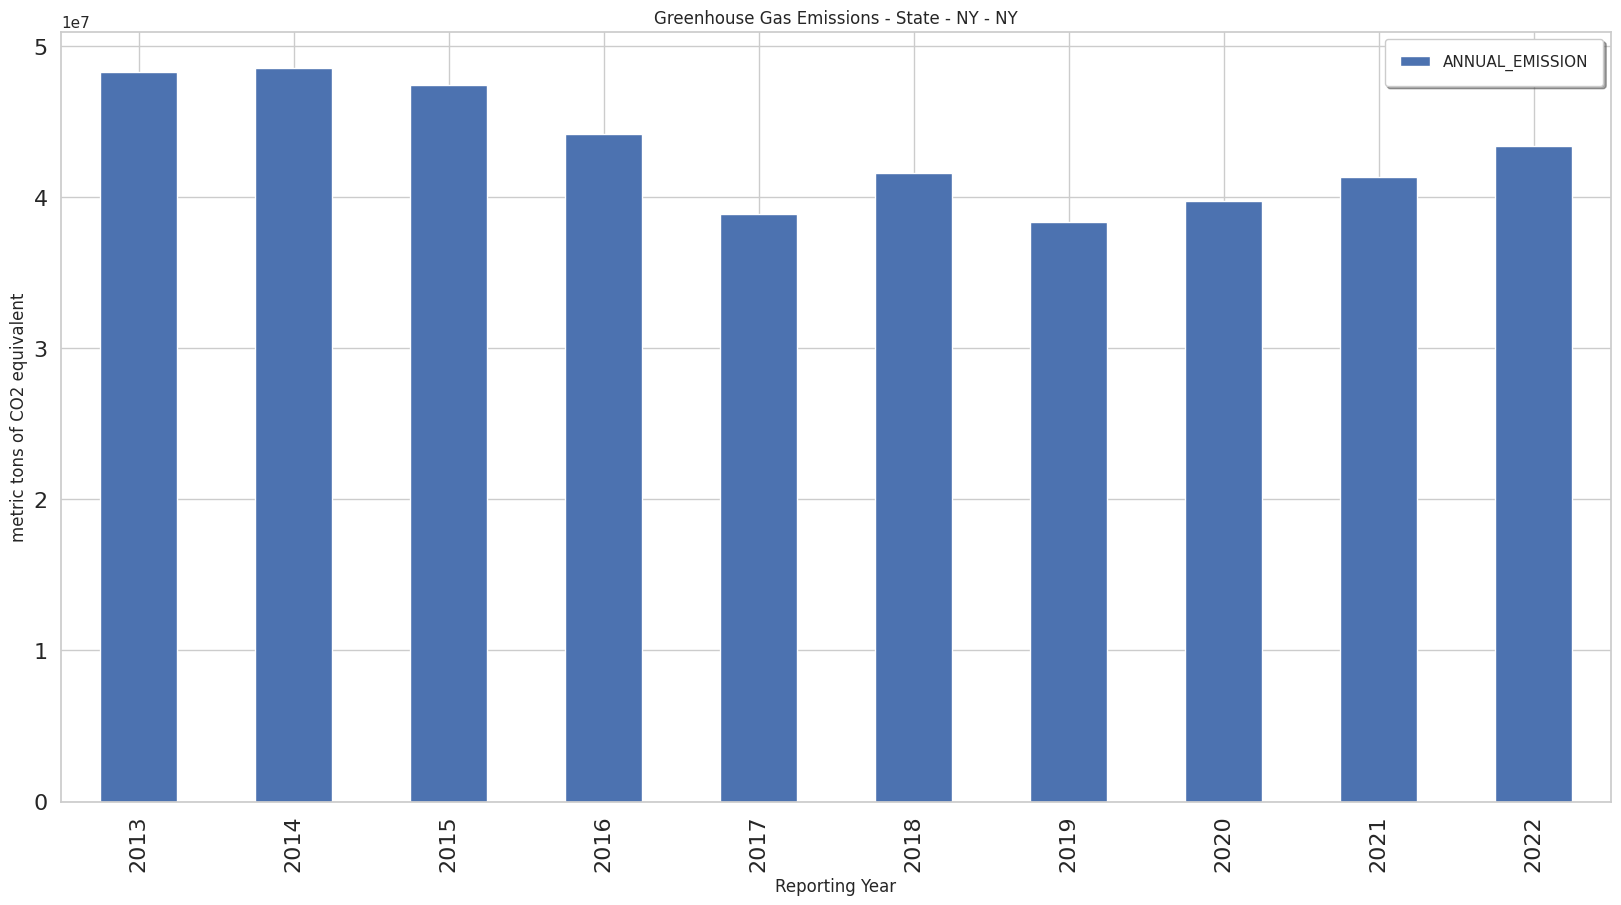

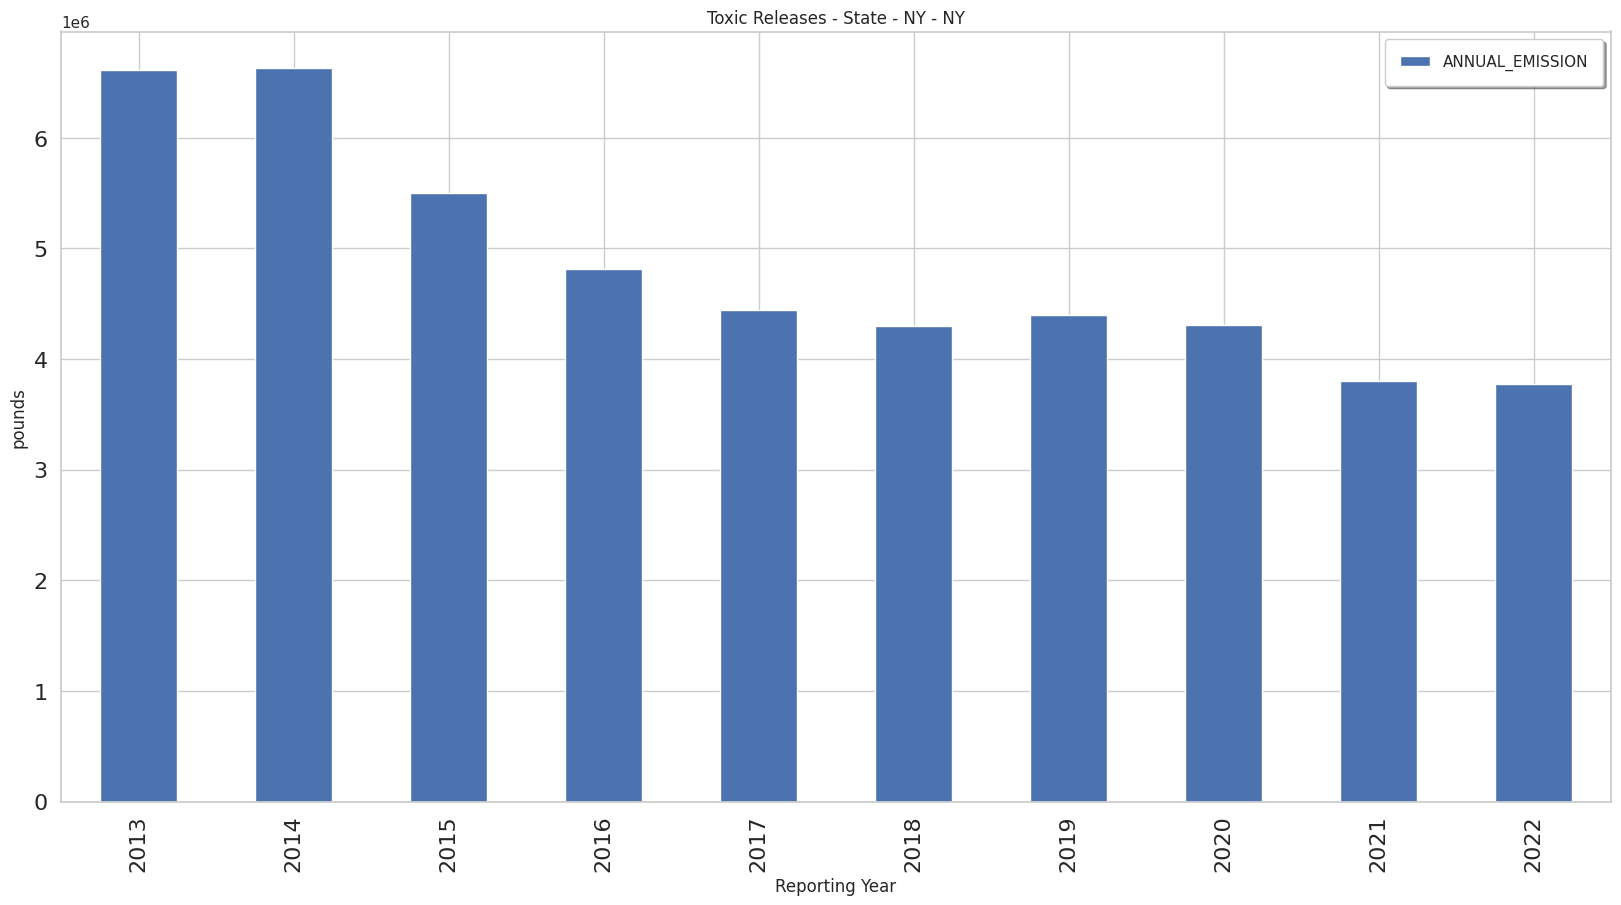

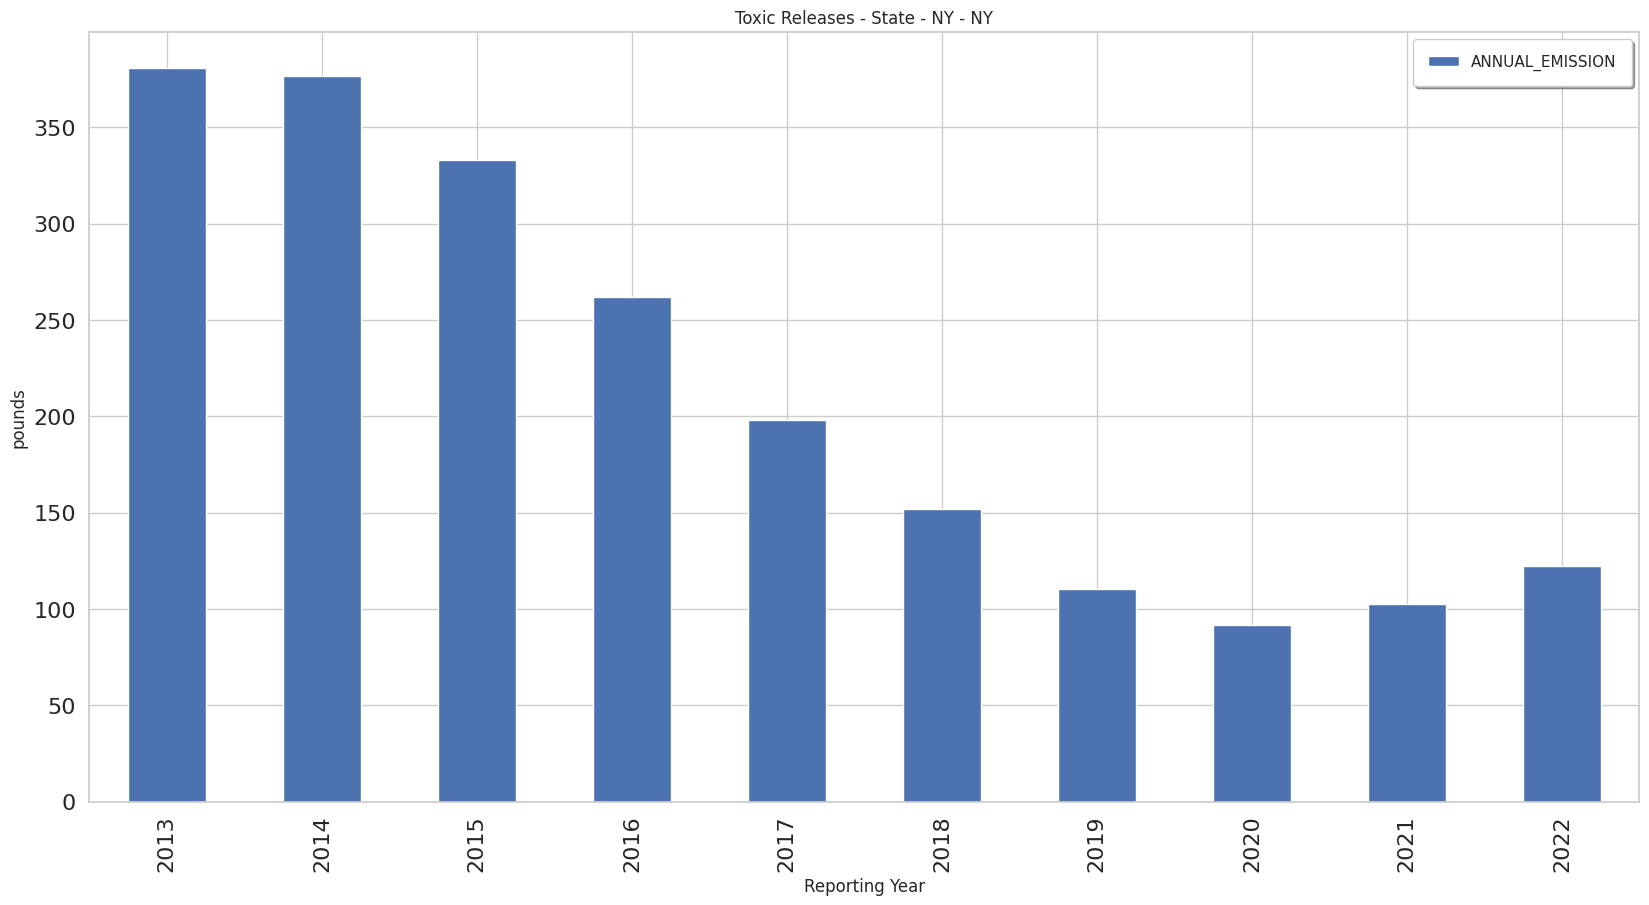

In [12]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant modules
from ECHO_modules.utilities import aggregate_by_facility, point_mapper

ds = make_data_sets(["Greenhouse Gas Emissions", "Toxic Releases"]) # Create a DataSet for handling the data
ny_ghg = ds["Greenhouse Gas Emissions"].store_results(region_type="State", region_value = "NY", state = "NY") # Store results for this DataSet as a DataSetResults object
ny_ghg.show_chart() # Total reported emissions in lbs (normalized to CO2e)
ny_tri = ds["Toxic Releases"].store_results(region_type="State", region_value = "NY", state = "NY")
ny_tri.show_chart() # Total emissions in lbs

ny_tri.dataframe = ny_tri.dataframe.loc[ny_tri.dataframe['POLLUTANT_NAME'].str.lower().str.contains("mercury")] # Filter NY_TRI records to just ones where the pollutant is mercury
ny_tri.show_chart() # Chart total mercury emissions in lbs

## Discharge Monitoring Reports (DMRs)

Facilities regulated under the Clean Water Act are required to submit monitoring reports directly to EPA. These represent extensive records of levels of pollutants discharged into waterbodies. We currently provide access to reports from Fiscal Year 2022.

The following code maps facilities with DMRs across two watersheds (note: watershed IDs currently have to be looked up separately).

In [13]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant modules
from ECHO_modules.get_data import get_spatial_data # Module for getting spatial data from the SBU database
from ECHO_modules.geographies import spatial_tables # Variables that support spatial queries
from ECHO_modules.utilities import bivariate_map, map_style # Use this function and variable to make our map

ds = make_data_sets(["2022 Discharge Monitoring"]) # Create a DataSet for handling the data
dmrs = ds["2022 Discharge Monitoring"].store_results(region_type="Watershed", region_value = ["04120103", "04120102"]) # Store results for this DataSet as a DataSetResults object
watersheds, state = get_spatial_data(region_type = "Watershed", states = ["NY"], spatial_tables = spatial_tables, region_filter = ["04120103", "04120102"]) # Query and return spatial data
bivariate_map(regions = watersheds, points = dmrs.dataframe.drop_duplicates(subset=["FAC_NAME"])) # Map each unique DMR-reporting facility in these watersheds

Data last modified: 2023-11-05 00:00:00
There were 16146 program records found

        SELECT this.* 
        FROM wbdhu8 AS this
        JOIN tl_2020_us_state AS other 
        ON other.stusps IN ('NY') 
        AND ST_Within(this.wkb_geometry,other.wkb_geometry) AND this.huc8 in ('04120103', '04120102') 


## Custom Queries: EJScreen

Records from EPA's EJScreen (2021) is available through custom SQL queries.

For example, the following returns EJScreen information for the state of New York and where the % of the population defined as a racial minority is greater than 75% and the % of the population defined as low-income is greater than 50%.

For more information about EJScreen, see the [documentation](https://gaftp.epa.gov/EJScreen/2021/2021_EJSCREEEN_columns-explained.xlsx) (.xlsx file).

In [14]:
from ECHO_modules.get_data import get_echo_data

sql = 'SELECT * FROM "EJSCREEN_2021_USPR" WHERE "ST_ABBREV" = \'NY\' AND "MINORPCT" > .75 AND "LOWINCPCT" > .5' # This query selects Census Block Group records from EJScreen for the state of New York and where the % of the population defined as a racial minority is greater than 75% and the % of the population defined as low-income is greater than 50%
results = get_echo_data(sql)
results

OBJECTID            ID  ACSTOTPOP  ACSIPOVBAS  ACSEDUCBAS  ACSTOTHH  \
0       127774  360010026004        846         846         414       327   
1       127692  360010001002       1275        1269         681       473   
2       127693  360010002001       2188        2074        1078       925   
3       127695  360010002003       1350        1350         835       633   
4       127700  360010003004       1785        1785        1060       611   
...        ...           ...        ...         ...         ...       ...   
1585    142550  361190031002       1989        1957        1280       829   
1586    142553  361190033001        921         921         582       281   
1587    142561  361190035001        866         866         573       393   
1588    142564  361190036002        961         961         634       424   
1589    142565  361190036003        681         681         543       305   

      ACSTOTHU  ACSUNEMPBAS  MINORPOP  MINORPCT  ...               T_PM25  \
0          375          310       698  0.825059  ...  7.23 ug/m3 (15%ile)   
1          534          607      1186  0.930196  ...  7.26 ug/m3 (16%ile)   
2         1089          946      2087  0.953839  ...  7.26 ug/m3 (16%ile)   
3         1002          628      1197  0.886667  ...  7.26 ug/m3 (16%ile)   
4          873          865      1518  0.850420  ...  7.29 ug/m3 (16%ile)   
...        ...          ...       ...       ...  ...                  ...   
1585       886          875      1977  0.993967  ...  8.89 ug/m3 (58%ile)   
1586       305          337       905  0.982628  ...  8.85 ug/m3 (57%ile)   
1587       441          398       793  0.915704  ...  8.94 ug/m3 (59%ile)   
1588       463          411       878  0.913632  ...   8.9 ug/m3 (58%ile)   
1589       357          369       535  0.785609  ...   8.9 ug/m3 (58%ile)   

      T_PM25_D2                               T_UST  T_UST_D2   AREALAND  \
0        77%ile  3.3 facilities/sq km area (69%ile)    82%ile  2742166.0   
1        83%ile  7.3 facilities/sq km area (84%ile)    92%ile   356872.0   
2        93%ile  3.9 facilities/sq km area (73%ile)    92%ile  1449294.0   
3        85%ile  6.1 facilities/sq km area (81%ile)    91%ile   216941.0   
4        89%ile   13 facilities/sq km area (92%ile)    97%ile   672588.0   
...         ...                                 ...       ...        ...   
1585     93%ile    0 facilities/sq km area (16%ile)    63%ile   118605.0   
1586     81%ile  6.3 facilities/sq km area (82%ile)    88%ile   185926.0   
1587     80%ile    0 facilities/sq km area (16%ile)    63%ile    89610.0   
1588     82%ile    0 facilities/sq km area (16%ile)    63%ile    89386.0   
1589     76%ile    0 facilities/sq km area (16%ile)    63%ile    98225.0   

      AREAWATER  NPL_CNT  TSDF_CNT  Shape_Length    Shape_Area  
0      452838.0        0         2  11684.527625  5.905165e+06  
1           0.0        0         0   3193.041281  6.605656e+05  
2           0.0        0         1   7321.882579  2.682032e+06  
3           0.0        0         0   3746.453457  4.013581e+05  
4           0.0        0         0   5231.452869  1.245085e+06  
...         ...      ...       ...           ...           ...  
1585        0.0        0         0   2346.873785  2.078409e+05  
1586        0.0        0         0   2636.743625  3.258491e+05  
1587        0.0        0         0   1845.327713  1.570525e+05  
1588        0.0        0         0   2028.600654  1.566716e+05  
1589        0.0        0         0   2083.948316  1.721568e+05  

[1590 rows x 155 columns]